# IMPORTING NECESSARY LIBRARIES

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import r2_score

In [366]:
import warnings
warnings.filterwarnings('ignore')

In [367]:
df = pd.read_csv("day.csv")

In [368]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Our dataset does not contain any null values as described by the above prompt




day.csv have the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [370]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA PREPROCESSING

And its already mentioned that "casual" and "registered" users are not the target variables so I'm going to drop those columns as well

In [371]:
df.drop(["casual","registered"], axis = 1, inplace = True)

In [372]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Since we are dealing with data if only year 2018, 2019 I want to check for outliers in the dteday column

In [373]:
# a summary on years

""".split("-") will split the date into 3 different parts x.split[0]: date,
x.split[1]: month, x.split[2]: year"""
df["dteday"].apply(lambda x: int(x.split("-")[2])).describe()


count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

In [374]:
# a summary on years
df["dteday"].apply(lambda x: int(x.split("-")[0])).describe()

#since we already have a month column there is o actual need to verify that

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [375]:
# I want to rename some columns for beter uncerstanding
df.rename(columns = {"yr":"year", "mnth":"month", "hum":"humidity", "cnt":"total_count"}, inplace=True)

In [376]:
# making a local copy of our dataframe
dataset = df.copy()

In [377]:
# And I want to check for some duplicate rows in our data
dataset.shape[0]
print("Before Dropping Duplicates \n")
print(f"There are '{dataset.shape[0]}' rows and '{dataset.shape[1]}' columns in our dataset \n")
#dropping duplicates
dataset.drop_duplicates(inplace=True)
print("\nAfter Dropping Duplicates")
print(f"There are '{dataset.shape[0]}' rows and '{dataset.shape[1]}' columns in our dataset \n")

Before Dropping Duplicates 

There are '730' rows and '14' columns in our dataset 


After Dropping Duplicates
There are '730' rows and '14' columns in our dataset 



#DATA VISUALIZATION

##1. Pairplot to see relation among variables

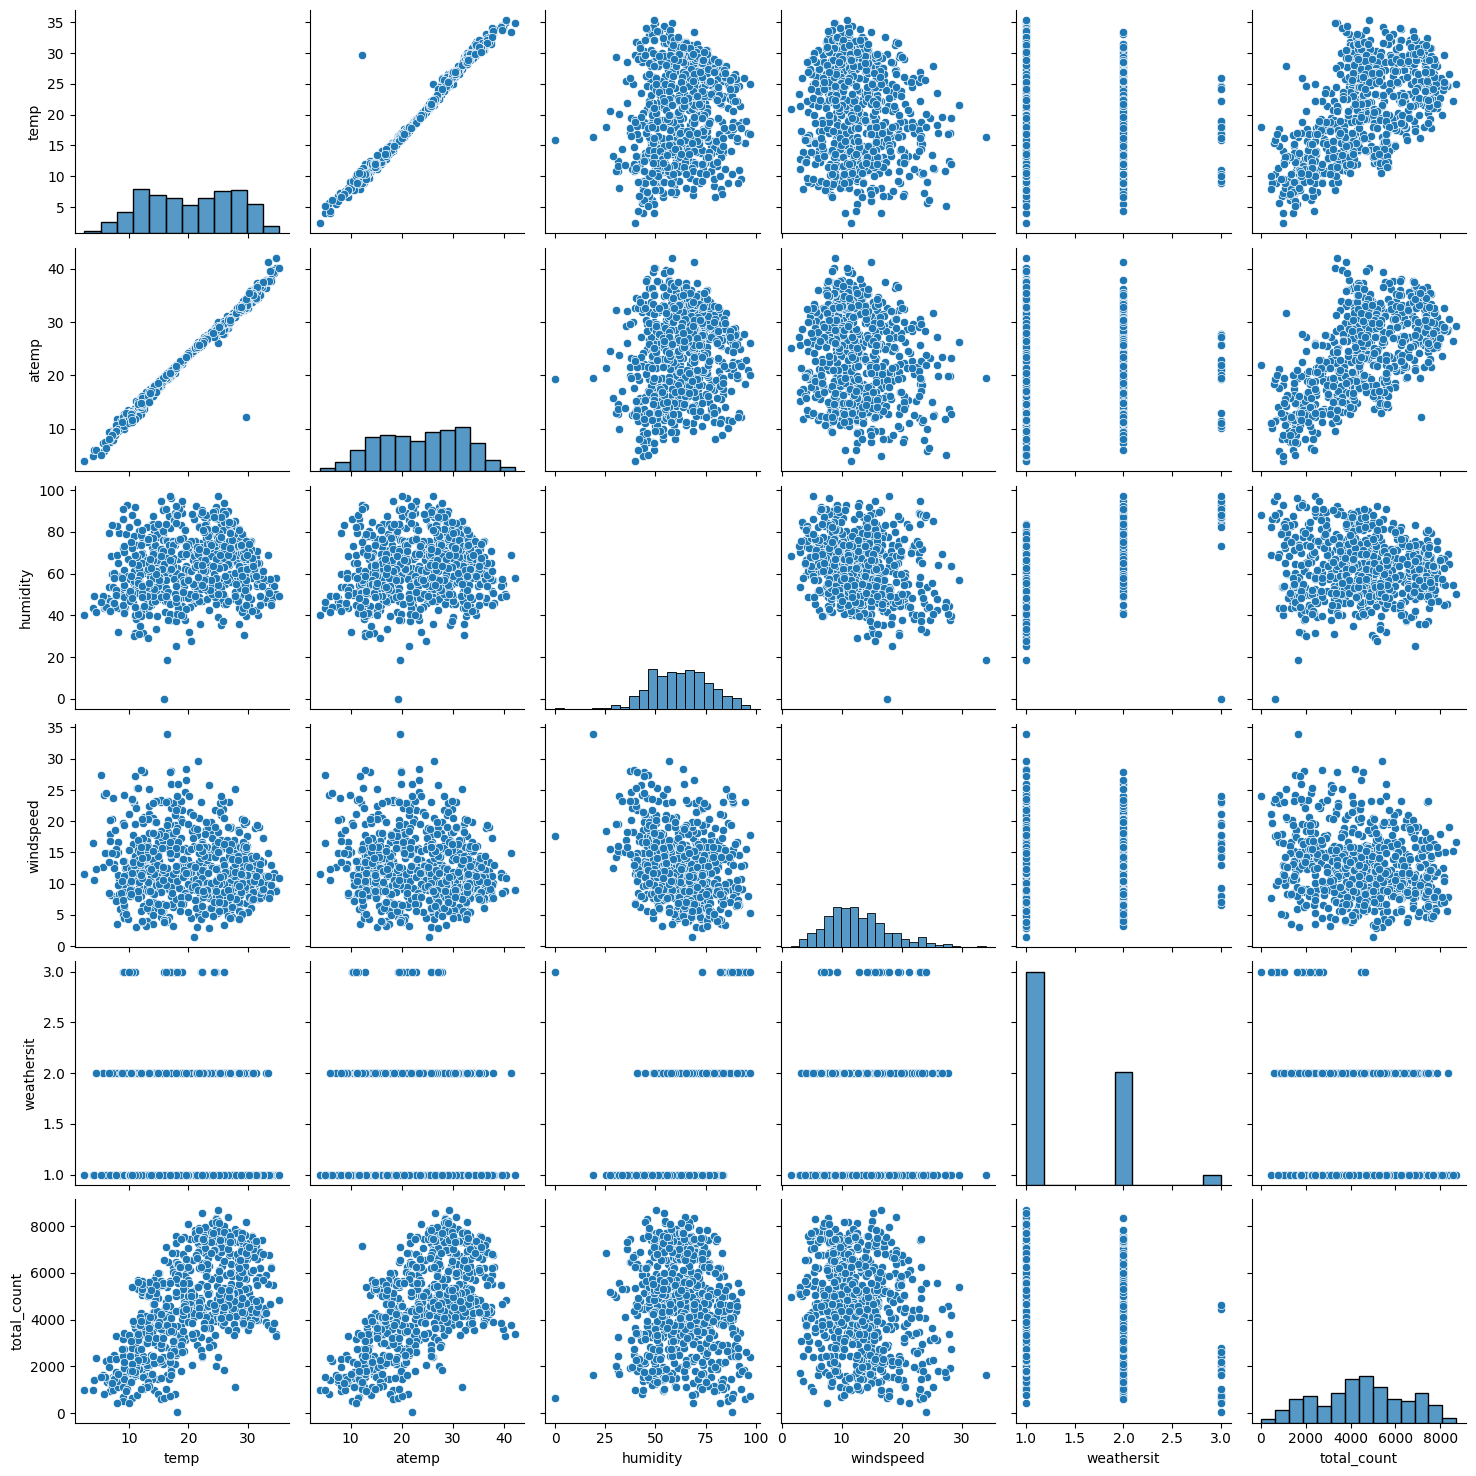

In [378]:
#scatter plot shows us the relation between two variables, so I'm using pairplot to intricacies between variables
sns.pairplot(dataset[["temp","atemp","humidity","windspeed","weathersit","total_count"]])
plt.show()

### OBSERVATION :

1. The relation between temp and atemp is highly correlated and this shows that there is a linear relationship between them.
2. It can be said that when the humidity is above 40, more people prefer to take rented bikes.
3. People are less likely to rent bikes when the wind speed is above 25.

##2. Season wise Distribution of total Rentals

Text(0.5, 1.0, 'Total rentals by season')

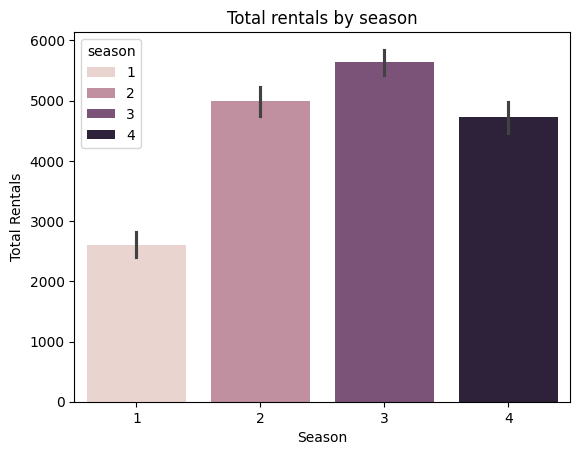

In [379]:
sns.barplot(x="season", y="total_count", data=dataset, hue="season")
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Total rentals by season')

### NOTE:

But before we move further with the visualization I want to map values for some categorical features

Categorical Features : "Season, Year, Month, Weekday, Weathersit"

Since we are mapping string values to the categorical features we need to change their dtype

In [380]:
#mapping correct values for the column "Season"
season_list = {1:"spring",2:"summer",3:"fall", 4:"winter"}
dataset.season = dataset.season.map(season_list)

In [381]:
#mapping correct values for the column "Year"
dataset["year"] = dataset["year"].map({0:2018, 1:2019})

In [382]:
#mapping correct values for the column "Month"
dataset["month"] = dataset["month"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",\
                                         5:"May", 6:"jun",7:"Jul",8:"Aug",\
                                         9:"Sep", 10:"Oct",11:"Nov",12:"Dec"})

In [383]:
#mapping correct values for the column "Weekday"
dataset["weekday"] = dataset["weekday"].map({0:"sun",1:"mon",2:"tue", 3:"wed", 4:"thr",\
                                             5:"fri",6:"sat"})

In [384]:
#mapping correct values for the column "Weathersit"
dataset["weathersit"] = dataset["weathersit"].map({1:"clear",2:"misty",3:"light snow & rain",\
                                           4:"heavy snow & rain"})

In [385]:
dataset.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,01-01-2018,spring,2018,Jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,Jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


##3. Total Count by Month

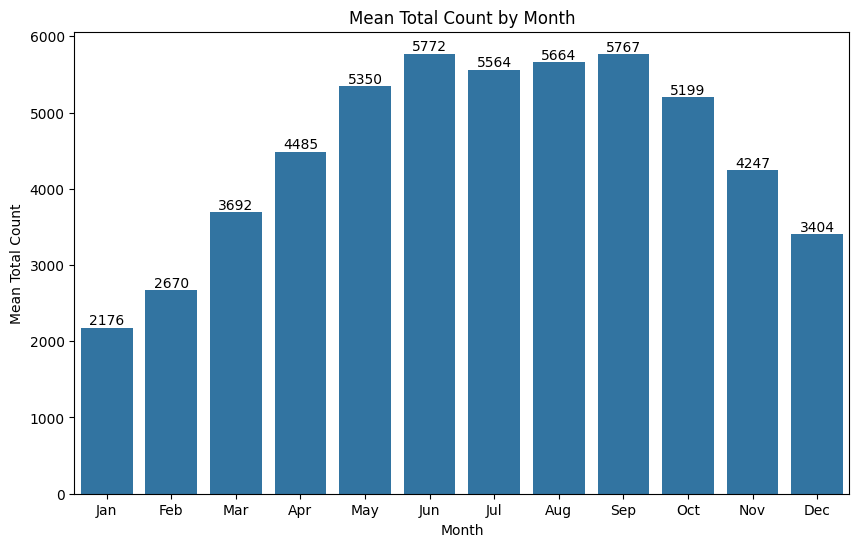

In [386]:
mean_counts = df.groupby("month")["total_count"].mean()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_counts.index, y=mean_counts.values)

x_label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(range(len(x_label)), x_label, rotation=0)

plt.xlabel("Month")
plt.ylabel("Mean Total Count")
plt.title("Mean Total Count by Month")

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()

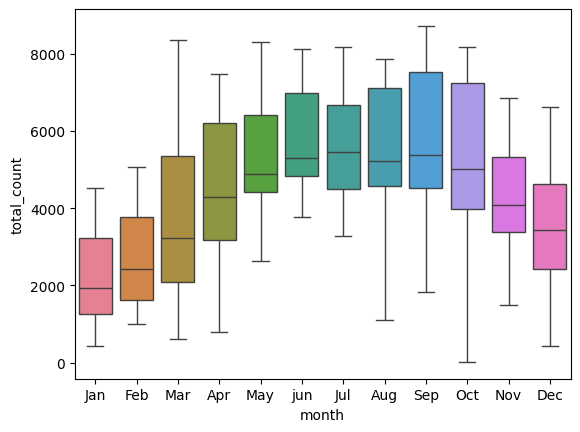

In [387]:
sns.boxplot(data=dataset, x= "month", y="total_count", hue = "month")
plt.show()

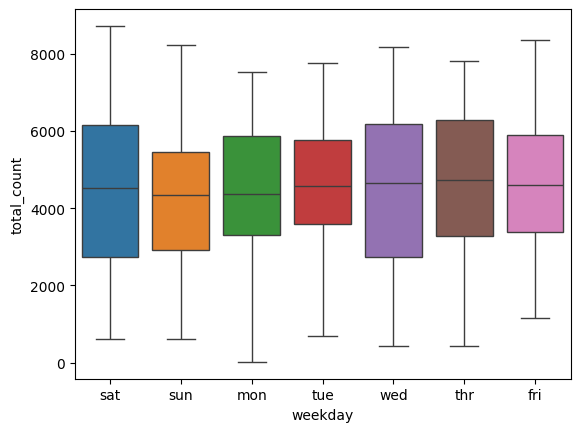

In [388]:
sns.boxplot(data=dataset, x="weekday", y="total_count", hue = "weekday")
plt.show()

##4. Season vs Weekday

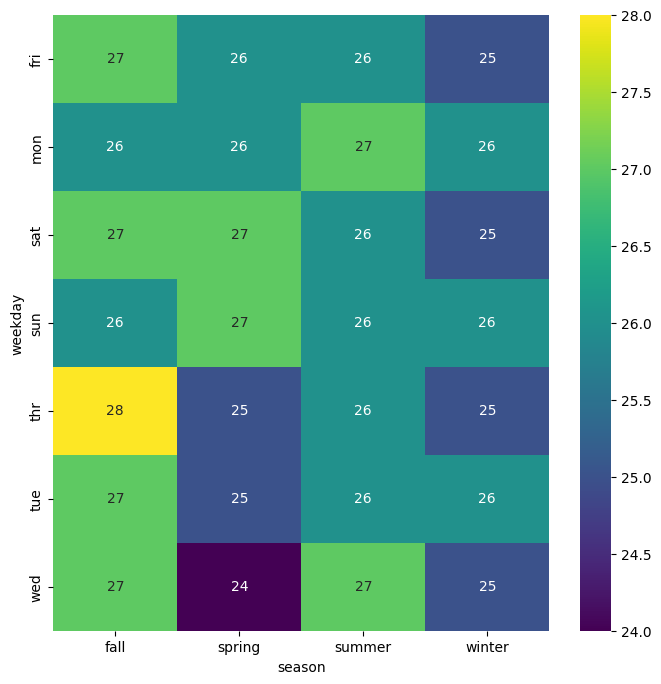

In [389]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['weekday'].value_counts()
    for x_label, grp in dataset.groupby('season')
})
sns.heatmap(df_2dhist, cmap='viridis', annot =True)
plt.xlabel('season')
_ = plt.ylabel('weekday')

##5. Average Temperature vs Total Rentals

Text(0.5, 1.0, 'Average Temperature vs Total Rentals')

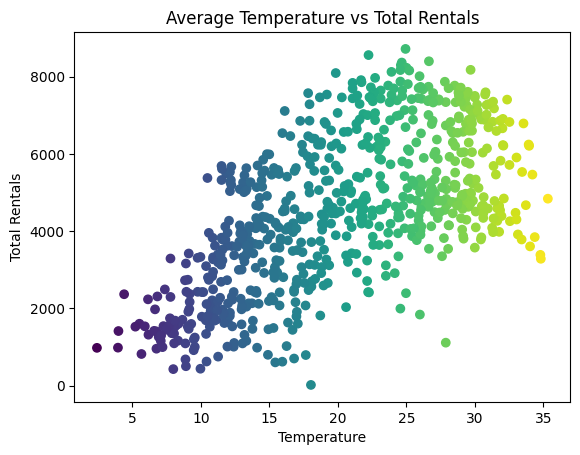

In [390]:
plt.scatter(df['temp'], df['total_count'], c=df['temp'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.title('Average Temperature vs Total Rentals')

## Correlation Heatmap

In [430]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    object 
 3   year         730 non-null    int64  
 4   month        730 non-null    object 
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    object 
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    object 
 9   atemp        730 non-null    float64
 10  humidity     730 non-null    float64
 11  windspeed    730 non-null    float64
 12  total_count  730 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 74.3+ KB


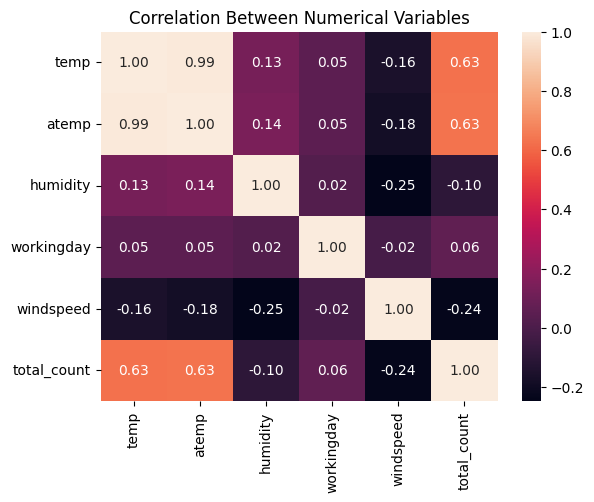

In [392]:
sns.heatmap(dataset[["temp","atemp","humidity","workingday","windspeed","total_count"]].corr(), annot=True, fmt='.2f')
plt.title("Correlation Between Numerical Variables")
plt.show()

## Observation :

There is a very high correlation betwwen temp and atemp, using both of these features in our linear regression model will introduce the conept of multicollinearity.

In [393]:
dataset.drop("temp",axis =1 , inplace = True)

<Axes: ylabel='Density'>

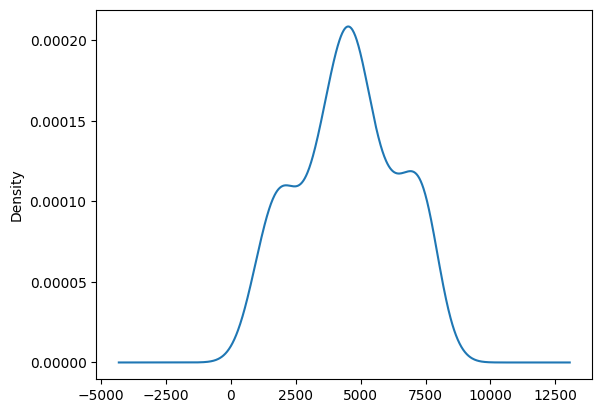

In [394]:
dataset["total_count"].plot.density()

#DATA PREPERATION

I'm going to create dummy variablkes for all the categorical features

In [395]:
# creating dummy variavles for month, weekdays, weathersi and season columns
month_dummy = pd.get_dummies(dataset.month, drop_first = True)
weekday_dummy = pd.get_dummies(dataset.weekday, drop_first=True)
weathersit_dummy= pd.get_dummies(dataset.weathersit, drop_first=True)
season_dummy = pd.get_dummies(dataset.season, drop_first=True)

In [396]:
#converting bool to int
month_dummy = month_dummy.astype(int)
weekday_dummy = weekday_dummy.astype(int)
weathersit_dummy= weathersit_dummy.astype(int)
season_dummy = season_dummy.astype(int)

In [397]:
#merging these column sback into datset(local copy df)
#new version of dataset column, dataset_new
dataset_new = pd.concat([dataset, month_dummy, weekday_dummy, weathersit_dummy, season_dummy], axis= 1)

In [398]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            730 non-null    int64  
 1   dteday             730 non-null    object 
 2   season             730 non-null    object 
 3   year               730 non-null    int64  
 4   month              730 non-null    object 
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    object 
 7   workingday         730 non-null    int64  
 8   weathersit         730 non-null    object 
 9   atemp              730 non-null    float64
 10  humidity           730 non-null    float64
 11  windspeed          730 non-null    float64
 12  total_count        730 non-null    int64  
 13  Aug                730 non-null    int64  
 14  Dec                730 non-null    int64  
 15  Feb                730 non-null    int64  
 16  Jan                730 non

In [399]:
#dteday and instant does not prive any value so I'm going to drop those features.
# And since we have created dummy variables we dont need "Season","Weekday","month", weathersit" columns
dataset_new.drop(["instant","dteday","season","weekday","month","weathersit"], axis = 1, inplace =True)

# SPLITTING THE DATA

In [400]:
#specify the random seed
np.random.seed(100)

#usually we form 4 series variable x_train, y_trainm,m x_test and y_test  here I'll use two dataframes for simplicity
dataset_train, dataset_test = train_test_split(dataset_new, train_size=0.7, random_state = 100)

print(f" The dataset_train has {dataset_train.shape[0]} rows and {dataset_train.shape[1]} columns.")
print(f" The dataset_test has {dataset_test.shape[0]} rows and {dataset_test.shape[1]} columns.")

 The dataset_train has 510 rows and 29 columns.
 The dataset_test has 220 rows and 29 columns.


In [401]:
dataset_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,Aug,Dec,Feb,...,sat,sun,thr,tue,wed,light snow & rain,misty,spring,summer,winter
576,2019,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,11.5850,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,18.8752,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,16.0977,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [402]:
#rescaling features
scaler = StandardScaler()
num_features = ["atemp","humidity","windspeed"]

#fit_transform
dataset_train[num_features] = scaler.fit_transform(dataset_train[num_features])
dataset_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,Aug,Dec,Feb,...,sat,sun,thr,tue,wed,light snow & rain,misty,spring,summer,winter
576,2019,0,1,1.193181,0.515796,-0.331282,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,-0.349583,-0.070634,-0.386359,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,-1.474112,-1.046051,2.017388,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,-0.572197,-1.001847,-0.780539,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,-0.915819,0.695551,0.354275,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0


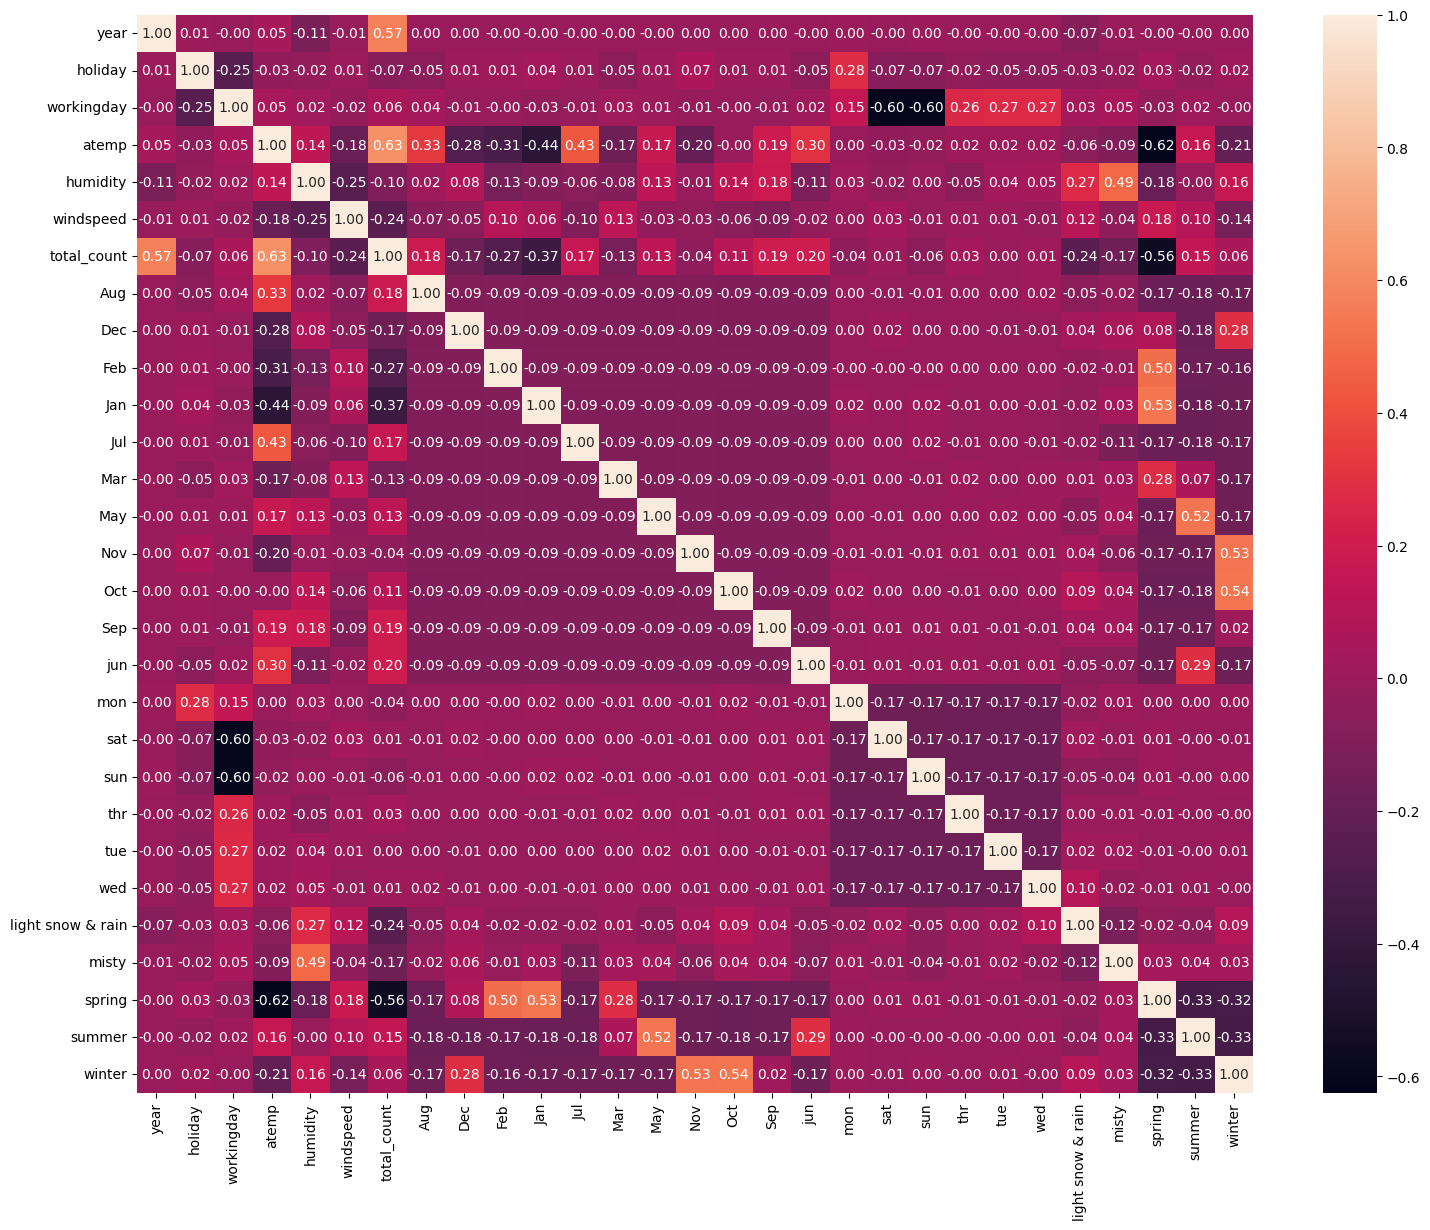

In [403]:
#Heatmap to see which feature is highly correlated
plt.figure(figsize=(18, 14))
sns.heatmap(data=dataset_new.corr(), annot=True, fmt=".2f")
plt.show()

#TRAINING THE MODEL

In [404]:
y_train = dataset_train.pop('total_count')
x_train = dataset_train

## Building 1st model with all variables

### Test on Training Set

In [405]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.07e-179
Time:                        21:12:08   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.286e+06   1.14e+05    -28.903      0.000   -3.51e+06   -3.06e+06
year               2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday            -8.22e+05   2.84e+04    -28.921      0.000   -8.78e+05   -7.66e+05
workingday        -8.213e+05   2.84e+04    -28.891      0.000   -8.77e+05   -7.65e+05
atemp               767.3741     83.648      9.174      0.000     603.014     931.734
humidity           -184.7831     49.133     -3.761      0.000    -281.325     -88.241
windspeed          -248.2007     38.253     -6.488      0.000    -323.364    -173.038
Aug                 364.0112    289.638      1.257      0.209    -205.098     933.120
Dec                -457.3409    293.247     -1.560      0.120   -1033.542     118.860
Feb                -350.8649    287.319     -1.221      0.223    -915.418     213.689
Jan                -639.3278    292.217     -2.188      0.029   -1213.505     -65.150
Jul                -127.7058    301.313     -0.424      0.672    -719.755     464.344
Mar                  -2.9910    215.152     -0.014      0.989    -425.742     419.760
May                 315.2600    181.811      1.734      0.084     -41.980     672.500
Nov                -397.2966    318.110     -1.249      0.212   -1022.351     227.758
Oct                  66.1125    314.307      0.210      0.833    -551.468     683.693
Sep                 831.4516    278.608      2.984      0.003     284.015    1378.888
jun                 210.6391    210.651      1.000      0.318    -203.268     624.546
mon                -228.4608    134.230     -1.702      0.089    -492.210      35.288
sat               -8.213e+05   2.84e+04    -28.893      0.000   -8.77e+05   -7.65e+05
sun               -8.218e+05   2.84e+04    -28.906      0.000   -8.78e+05   -7.66e+05
thr                -113.7140    136.221     -0.835      0.404    -381.374     153.946
tue                -185.9042    135.905     -1.368      0.172    -452.944      81.136
wed                 -71.2039    130.689     -0.545      0.586    -327.995     185.587
light snow & rain -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
misty              -531.6674     91.194     -5.830      0.000    -710.854    -352.481
spring             -451.3037    261.814     -1.724      0.085    -965.742      63.135
summer              302.6216    227.990      1.327      0.185    -145.356     750.599
winter              882.2864    244.260      3.612      0.000     402.340    1362.232
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:      

### Checking its VIF

In [406]:
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,11587121.29
18,sat,2653232.35
19,sun,2451844.58
1,holiday,436573.50
25,spring,10.70
27,winter,9.41
26,summer,8.20
13,Nov,6.76
14,Oct,6.47
6,Aug,6.18


## 2ND MODEL

In [407]:
#dropping the"workingday" column although it's P>|t| is 0.00 but it is shure introducing a lot of multicolinearity
x = x_train.drop("workingday", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.07e-179
Time:                        21:12:08   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.108e+06   1.42e+05    -28.901      0.000   -4.39e+06   -3.83e+06
year               2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday            -688.4127    232.930     -2.955      0.003   -1146.096    -230.730
atemp               767.3741     83.648      9.174      0.000     603.014     931.734
humidity           -184.7831     49.133     -3.761      0.000    -281.325     -88.241
windspeed          -248.2007     38.253     -6.488      0.000    -323.364    -173.038
Aug                 364.0112    289.638      1.257      0.209    -205.098     933.120
Dec                -457.3409    293.247     -1.560      0.120   -1033.542     118.860
Feb                -350.8649    287.319     -1.221      0.223    -915.418     213.689
Jan                -639.3278    292.217     -2.188      0.029   -1213.505     -65.150
Jul                -127.7058    301.313     -0.424      0.672    -719.755     464.344
Mar                  -2.9910    215.152     -0.014      0.989    -425.742     419.760
May                 315.2600    181.811      1.734      0.084     -41.980     672.500
Nov                -397.2966    318.110     -1.249      0.212   -1022.351     227.758
Oct                  66.1125    314.307      0.210      0.833    -551.468     683.693
Sep                 831.4516    278.608      2.984      0.003     284.015    1378.888
jun                 210.6391    210.651      1.000      0.318    -203.268     624.546
mon                -228.4608    134.230     -1.702      0.089    -492.210      35.288
sat                 -37.0788    130.849     -0.283      0.777    -294.183     220.025
sun                -509.9041    133.773     -3.812      0.000    -772.754    -247.054
thr                -113.7140    136.221     -0.835      0.404    -381.374     153.946
tue                -185.9042    135.905     -1.368      0.172    -452.944      81.136
wed                 -71.2039    130.689     -0.545      0.586    -327.995     185.587
light snow & rain -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
misty              -531.6674     91.194     -5.830      0.000    -710.854    -352.481
spring             -451.3037    261.814     -1.724      0.085    -965.742      63.135
summer              302.6216    227.990      1.327      0.185    -145.356     750.599
winter              882.2864    244.260      3.612      0.000     402.340    1362.232
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     8.35e+06
======================

In [408]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,65.01
24,spring,14.13
26,winter,12.47
25,summer,10.88
12,Nov,7.40
13,Oct,7.05
5,Aug,6.83
8,Jan,6.38
6,Dec,6.15
9,Jul,5.87


## 3RD MODEL

In [409]:
#dropping the"Oct" column due to high P>|t| and VIF values

x = x.drop("Oct", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.05e-180
Time:                        21:12:09   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     483   BIC:                             8374.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.106e+06   1.42e+05    -28.947      0.000   -4.39e+06   -3.83e+06
year               2036.6797     70.281     28.979      0.000    1898.585    2174.774
holiday            -685.6425    232.327     -2.951      0.003   -1142.139    -229.146
atemp               766.7273     83.509      9.181      0.000     602.642     930.813
humidity           -183.5254     48.720     -3.767      0.000    -279.254     -87.797
windspeed          -248.1677     38.215     -6.494      0.000    -323.255    -173.080
Aug                 333.9449    251.661      1.327      0.185    -160.540     828.430
Dec                -506.5468    176.659     -2.867      0.004    -853.663    -159.431
Feb                -381.9322    246.206     -1.551      0.121    -865.700     101.836
Jan                -670.8051    250.743     -2.675      0.008   -1163.487    -178.123
Jul                -157.2974    266.191     -0.591      0.555    -680.333     365.738
Mar                 -26.4602    183.777     -0.144      0.886    -387.562     334.642
May                 304.5787    174.402      1.746      0.081     -38.103     647.260
Nov                -453.9013    169.468     -2.678      0.008    -786.887    -120.916
Sep                 794.9286    217.669      3.652      0.000     367.234    1222.623
jun                 193.9246    194.895      0.995      0.320    -189.022     576.871
mon                -228.7505    134.090     -1.706      0.089    -492.223      34.722
sat                 -36.7550    130.710     -0.281      0.779    -293.585     220.076
sun                -509.6711    133.636     -3.814      0.000    -772.251    -247.092
thr                -113.3589    136.076     -0.833      0.405    -380.732     154.014
tue                -186.2171    135.762     -1.372      0.171    -452.975      80.541
wed                 -71.2170    130.560     -0.545      0.586    -327.753     185.319
light snow & rain -2197.9345    231.270     -9.504      0.000   -2652.354   -1743.515
misty              -532.1939     91.069     -5.844      0.000    -711.134    -353.253
spring             -451.2174    261.555     -1.725      0.085    -965.143      62.708
summer              282.4697    206.679      1.367      0.172    -123.632     688.572
winter              907.4783    212.672      4.267      0.000     489.601    1325.355
==============================================================================
Omnibus:                       84.872   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.387
Skew:                          -0.782   Prob(JB):                     3.50e-56
Kurtosis:                       6.094   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors a

In [410]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,46.79
23,spring,14.13
25,winter,9.48
24,summer,8.95
2,atemp,5.78
5,Aug,5.17
8,Jan,4.70
9,Jul,4.60
7,Feb,3.43
13,Sep,3.24


## 4TH MODEL

In [411]:
#dropping the "Mar" column due to high P>|t| and VIF values

x = x.drop("Mar", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.00e-181
Time:                        21:12:09   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     484   BIC:                             8367.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.106e+06   1.42e+05    -28.978      0.000   -4.38e+06   -3.83e+06
year               2036.5122     70.200     29.010      0.000    1898.577    2174.447
holiday            -683.6208    231.667     -2.951      0.003   -1138.819    -228.423
atemp               768.7728     82.208      9.352      0.000     607.243     930.302
humidity           -183.6613     48.661     -3.774      0.000    -279.275     -88.048
windspeed          -247.7586     38.070     -6.508      0.000    -322.562    -172.955
Aug                 338.5160    249.397      1.357      0.175    -151.519     828.551
Dec                -495.6598    159.497     -3.108      0.002    -809.053    -182.267
Feb                -359.2331    188.919     -1.902      0.058    -730.435      11.969
Jan                -647.0831    188.823     -3.427      0.001   -1018.096    -276.070
Jul                -153.5401    264.641     -0.580      0.562    -673.527     366.447
May                 311.2698    167.927      1.854      0.064     -18.686     641.225
Nov                -448.9080    165.714     -2.709      0.007    -774.515    -123.301
Sep                 799.7229    214.889      3.722      0.000     377.493    1221.953
jun                 199.1344    191.313      1.041      0.298    -176.772     575.041
mon                -229.2361    133.912     -1.712      0.088    -492.358      33.885
sat                 -36.9274    130.572     -0.283      0.777    -293.486     219.631
sun                -509.1118    133.444     -3.815      0.000    -771.313    -246.910
thr                -114.2652    135.792     -0.841      0.401    -381.081     152.550
tue                -186.4802    135.613     -1.375      0.170    -452.943      79.982
wed                 -71.4140    130.421     -0.548      0.584    -327.675     184.847
light snow & rain -2197.4383    231.010     -9.512      0.000   -2651.345   -1743.531
misty              -532.2434     90.976     -5.850      0.000    -711.001    -353.486
spring             -465.4637    241.872     -1.924      0.055    -940.712       9.785
summer              281.4103    206.339      1.364      0.173    -124.021     686.842
winter              910.1640    211.638      4.301      0.000     494.321    1326.007
==============================================================================
Omnibus:                       84.681   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.521
Skew:                          -0.782   Prob(JB):                     8.89e-56
Kurtosis:                       6.080   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

In [412]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,45.12
22,spring,12.10
24,winter,9.41
23,summer,8.94
2,atemp,5.61
5,Aug,5.09
9,Jul,4.55
12,Sep,3.16
8,Jan,2.67
21,misty,2.42


## 5TH MODEL

In [413]:
#dropping the "sat" column due to high P>|t| and VIF values

x = x.drop("sat", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          9.64e-183
Time:                        21:12:09   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     485   BIC:                             8361.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.106e+06   1.42e+05    -29.010      0.000   -4.38e+06   -3.83e+06
year               2036.7251     70.130     29.042      0.000    1898.930    2174.521
holiday            -681.6084    231.338     -2.946      0.003   -1136.158    -227.059
atemp               768.7686     82.130      9.360      0.000     607.393     930.144
humidity           -183.7309     48.615     -3.779      0.000    -279.252     -88.210
windspeed          -248.1313     38.011     -6.528      0.000    -322.819    -173.444
Aug                 336.0826    249.012      1.350      0.178    -153.193     825.359
Dec                -496.3158    159.329     -3.115      0.002    -809.376    -183.255
Feb                -357.8388    188.675     -1.897      0.058    -728.560      12.883
Jan                -647.3210    188.642     -3.431      0.001   -1017.977    -276.665
Jul                -155.6954    264.280     -0.589      0.556    -674.971     363.580
May                 312.4499    167.716      1.863      0.063     -17.089     641.989
Nov                -449.8113    165.526     -2.717      0.007    -775.047    -124.575
Sep                 797.3572    214.522      3.717      0.000     375.850    1218.865
jun                 197.7109    191.065      1.035      0.301    -177.707     573.128
mon                -209.1787    113.482     -1.843      0.066    -432.156      13.799
sun                -488.7953    112.351     -4.351      0.000    -709.550    -268.041
thr                 -93.8995    115.016     -0.816      0.415    -319.891     132.092
tue                -166.3582    115.340     -1.442      0.150    -392.985      60.269
wed                 -51.0419    108.620     -0.470      0.639    -264.465     162.381
light snow & rain -2200.1265    230.596     -9.541      0.000   -2653.217   -1747.036
misty              -531.1879     90.813     -5.849      0.000    -709.624    -352.752
spring             -468.5551    241.395     -1.941      0.053    -942.865       5.755
summer              278.5157    205.890      1.353      0.177    -126.030     683.062
winter              907.2929    211.194      4.296      0.000     492.325    1322.261
==============================================================================
Omnibus:                       85.239   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.630
Skew:                          -0.788   Prob(JB):                     5.10e-56
Kurtosis:                       6.082   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinear

In [414]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,41.76
21,spring,12.07
23,winter,9.39
22,summer,8.92
2,atemp,5.61
5,Aug,5.08
9,Jul,4.55
12,Sep,3.16
8,Jan,2.67
20,misty,2.42


## 6TH MODEL

In [415]:
#dropping the "wed" column due to high P>|t| and VIF values

x = x.drop("wed", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          9.71e-184
Time:                        21:12:09   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     486   BIC:                             8355.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.105e+06   1.41e+05    -29.030      0.000   -4.38e+06   -3.83e+06
year               2036.0349     70.058     29.062      0.000    1898.381    2173.689
holiday            -679.5270    231.111     -2.940      0.003   -1133.626    -225.428
atemp               767.4372     82.016      9.357      0.000     606.288     928.586
humidity           -184.7122     48.531     -3.806      0.000    -280.068     -89.356
windspeed          -247.7344     37.972     -6.524      0.000    -322.343    -173.126
Aug                 338.7798    248.746      1.362      0.174    -149.972     827.531
Dec                -495.4633    159.191     -3.112      0.002    -808.251    -182.676
Feb                -359.3604    188.496     -1.906      0.057    -729.728      11.007
Jan                -648.6404    188.469     -3.442      0.001   -1018.956    -278.325
Jul                -150.7602    263.860     -0.571      0.568    -669.206     367.686
May                 311.3194    167.564      1.858      0.064     -17.920     640.559
Nov                -453.4149    165.215     -2.744      0.006    -778.039    -128.790
Sep                 797.4480    214.350      3.720      0.000     376.281    1218.615
jun                 197.5108    190.911      1.035      0.301    -177.603     572.624
mon                -190.9360    106.550     -1.792      0.074    -400.292      18.419
sun                -470.3559    105.191     -4.471      0.000    -677.041    -263.670
thr                 -75.2014    107.828     -0.697      0.486    -287.068     136.665
tue                -147.8237    108.299     -1.365      0.173    -360.616      64.969
light snow & rain -2206.3596    230.029     -9.592      0.000   -2658.334   -1754.385
misty              -529.2053     90.643     -5.838      0.000    -707.305    -351.106
spring             -468.7991    241.201     -1.944      0.053    -942.725       5.127
summer              278.2903    205.724      1.353      0.177    -125.928     682.509
winter              909.0234    210.992      4.308      0.000     494.453    1323.593
==============================================================================
Omnibus:                       83.740   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.581
Skew:                          -0.772   Prob(JB):                     2.34e-55
Kurtosis:                       6.075   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [416]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,40.32
20,spring,12.07
22,winter,9.39
21,summer,8.92
2,atemp,5.61
5,Aug,5.08
9,Jul,4.54
12,Sep,3.16
8,Jan,2.67
19,misty,2.41


## 7TH MODEL

In [417]:
#dropping the "summer" column due to high P>|t| and VIF values

x = x.drop("summer", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.12e-184
Time:                        21:12:09   Log-Likelihood:                -4103.7
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     487   BIC:                             8351.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.113e+06   1.41e+05    -29.090      0.000   -4.39e+06   -3.84e+06
year               2040.2197     70.049     29.125      0.000    1902.583    2177.856
holiday            -683.1265    231.292     -2.954      0.003   -1137.580    -228.673
atemp               752.0121     81.288      9.251      0.000     592.293     911.731
humidity           -182.6276     48.548     -3.762      0.000    -278.016     -87.239
windspeed          -245.1812     37.957     -6.459      0.000    -319.761    -170.602
Aug                 107.5319    180.851      0.595      0.552    -247.813     462.876
Dec                -528.7554    157.411     -3.359      0.001    -838.044    -219.467
Feb                -375.8032    188.264     -1.996      0.046    -745.713      -5.894
Jan                -670.1035    187.960     -3.565      0.000   -1039.417    -300.790
Jul                -375.6304    205.085     -1.832      0.068    -778.591      27.330
May                 348.6563    165.416      2.108      0.036      23.639     673.673
Nov                -491.5042    162.937     -3.017      0.003    -811.650    -171.358
Sep                 608.8344    162.942      3.737      0.000     288.679     928.990
jun                 144.3903    186.988      0.772      0.440    -223.013     511.794
mon                -192.9158    106.631     -1.809      0.071    -402.429      16.597
sun                -472.8127    105.265     -4.492      0.000    -679.642    -265.983
thr                 -80.2283    107.855     -0.744      0.457    -292.148     131.691
tue                -147.3346    108.391     -1.359      0.175    -360.306      65.637
light snow & rain -2226.4929    229.743     -9.691      0.000   -2677.902   -1775.083
misty              -528.0301     90.716     -5.821      0.000    -706.272    -349.788
spring             -717.4093    156.343     -4.589      0.000   -1024.600    -410.218
winter              691.0564    136.332      5.069      0.000     423.185     958.928
==============================================================================
Omnibus:                       85.629   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.633
Skew:                          -0.783   Prob(JB):                     9.33e-58
Kurtosis:                       6.148   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [418]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,11.38
2,atemp,5.51
20,spring,5.07
21,winter,3.92
9,Jul,2.72
5,Aug,2.67
8,Jan,2.65
19,misty,2.41
13,jun,2.26
7,Feb,2.01


# TESTING THE OUTPUT - RESIDUAL ANALYSIS

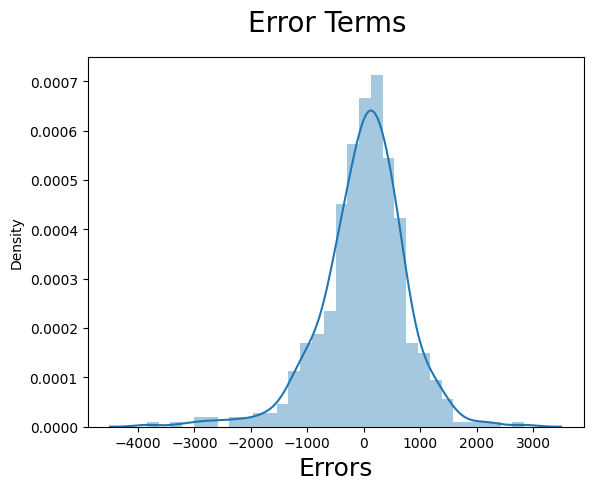

In [419]:
# Residual analysis
y_train_pred = lr_model.predict(x_train_sm)
res = y_train - y_train_pred

# plot the residual
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## OBSERVATION - ERROR TERMS
Errors terms are normally distributed which indicate that the model's assumptions are met

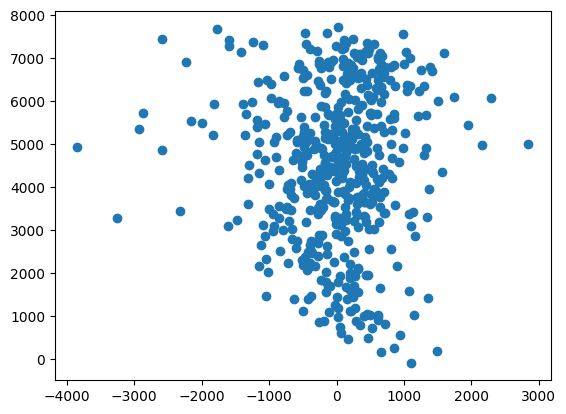

In [420]:
# Homoscedasticity
plt.scatter(res, y_train_pred)
plt.show()

## OBSERVATION - ERROR TERMS
There is no pattern observed in the above graph, hence Homoscedasticity assumption is satisfied

#PREDICTIONG AND EVALUATION

In [421]:
# Rescaling on numeric variables for Test set
num_vars = ['atemp','humidity','windspeed']

# Fit on data
dataset_test[num_vars] = scaler.transform(dataset_test[num_vars])
dataset_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,Aug,Dec,Feb,...,sat,sun,thr,tue,wed,light snow & rain,misty,spring,summer,winter
184,2018,1,0,1.208775,0.047244,-1.395126,6043,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,2019,0,1,1.552446,-0.276917,-0.985373,6211,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,2018,0,1,-0.080166,1.284930,0.078536,2659,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,2018,0,1,1.329807,-1.464502,0.110155,4780,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,2018,0,1,1.075935,-2.307309,1.276437,4968,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [422]:
y_test = dataset_test.pop("total_count")
x_test = dataset_test

In [424]:
dataset_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,...,sat,sun,thr,tue,wed,light snow & rain,misty,spring,summer,winter
184,2018,1,0,1.208775,0.047244,-1.395126,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,2019,0,1,1.552446,-0.276917,-0.985373,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,2018,0,1,-0.080166,1.284930,0.078536,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,2018,0,1,1.329807,-1.464502,0.110155,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,2018,0,1,1.075935,-2.307309,1.276437,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [425]:
#adding a constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,year,holiday,workingday,atemp,humidity,windspeed,Aug,Dec,Feb,...,sat,sun,thr,tue,wed,light snow & rain,misty,spring,summer,winter
184,1.0,2018,1,0,1.208775,0.047244,-1.395126,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,2019,0,1,1.552446,-0.276917,-0.985373,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,2018,0,1,-0.080166,1.284930,0.078536,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,2018,0,1,1.329807,-1.464502,0.110155,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,2018,0,1,1.075935,-2.307309,1.276437,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [426]:
# dropping the features which were not in the final model
x_test_sm.drop(["workingday","Oct","Mar","sat","wed","summer"], axis=1, inplace=True)
x_test_sm.head()

,const,year,holiday,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,...,Sep,jun,mon,sun,thr,tue,light snow & rain,misty,spring,winter
184,1.0,2018,1,1.208775,0.047244,-1.395126,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
535,1.0,2019,0,1.552446,-0.276917,-0.985373,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
299,1.0,2018,0,-0.080166,1.284930,0.078536,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
221,1.0,2018,0,1.329807,-1.464502,0.110155,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,2018,0,1.075935,-2.307309,1.276437,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [427]:
#prediciting the model
y_test_pred = lr_model.predict(x_test_sm)

In [428]:
#evaluating
r2_score(y_true= y_test, y_pred=y_test_pred)

0.8363112344294795